# Description:                                                                                                                   
 The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
 
 Attributes:
 1. Glucose Level
 2. BMI
 3. Blood pressure
 4. Pregnancies
 5. Skin thickness
 6. Insulin
 7. Diabetes pedigree function
 8. Age
 9. Outcome

 Step 0: Import libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
dataset = pd.read_csv('..\Datasets\diabetes.csv')
dataset_X = dataset.iloc[:,[1, 4, 5, 7]].values
dataset_Y = dataset.iloc[:,8].values

In [3]:
dataset_X

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [4]:
dataset_Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_X)

In [6]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [7]:
X = dataset_scaled
Y = dataset_Y


In [8]:
print(X.head())

          0         1         2         3
0  0.743719  0.000000  0.500745  0.483333
1  0.427136  0.000000  0.396423  0.166667
2  0.919598  0.000000  0.347243  0.183333
3  0.447236  0.111111  0.418778  0.000000
4  0.688442  0.198582  0.642325  0.200000


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['Outcome'] )



In [10]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)


SVC(kernel='linear', random_state=42)

In [11]:
svc.score(X_test, Y_test)

0.7337662337662337

In [12]:
Y_pred = svc.predict(X_test)

In [13]:
pickle.dump(svc, open('diabetesmodel.pkl','wb'))


In [14]:
model = pickle.load(open('diabetesmodel.pkl','rb'))
print(model.predict(sc.transform(np.array([[86, 66, 26.6, 31]]))))


[0]


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, Y_train)

# Predict the class labels for the test set
y_pred = dtc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7337662337662337


In [19]:
# Importing the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Creating an instance of KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training the model using the training data
knn.fit(X_train, Y_train)

# Testing the model on the test data
accuracy = knn.score(X_test, Y_test)

# Printing the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7337662337662337


c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Initialize a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Evaluate model performance using accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Random Forest accuracy:', accuracy)


Random Forest accuracy: 0.7337662337662337


In [21]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



# Initialize a Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model performance using accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print('Naive Bayes accuracy:', accuracy)


Naive Bayes accuracy: 0.7337662337662337


In [23]:
# Import required libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Convert data to XGBoost DMatrix format
train_dmatrix = xgb.DMatrix(X_train, label=Y_train)
test_dmatrix = xgb.DMatrix(X_test, label=Y_test)

# Set XGBoost parameters
params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1}

# Train the XGBoost model
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Make predictions on the test data
y_pred = xgb_model.predict(test_dmatrix)

# Convert predicted probabilities to binary labels
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

# Evaluate model performance using accuracy score
accuracy = accuracy_score(Y_test, y_pred_binary)
print('XGBoost accuracy:', accuracy)


XGBoost accuracy: 0.7532467532467533


In [25]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier



# Create a list of algorithms to evaluate
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('XGBOOSTER', xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1)))
models.append(('k-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))

# Evaluate each algorithm using 10-fold cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: mean=%f (std=%f)" % (name, cv_results.mean(), cv_results.std()))

# Select the model with the best accuracy
import numpy as np
best_idx = np.argmax([np.mean(r) for r in results])
best_name = names[best_idx]
print('Best Algorithm:', best_name)
# Select the model with the highest accuracy
#best_model = max([(logreg_accuracy, logreg_model), (rf_accuracy, rf_model), (svm_accuracy, svm_model)], key=lambda x: x[0])[1]

# Save the best model using pickle
#with open('best_model.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)


Decision Tree: mean=0.674273 (std=0.041631)
Naive Bayes: mean=0.766949 (std=0.050300)
XGBOOSTER: mean=0.750767 (std=0.056714)
k-NN: mean=0.741169 (std=0.063480)


c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

SVM: mean=0.776705 (std=0.069659)
Random Forest: mean=0.732919 (std=0.061357)
Best Algorithm: SVM


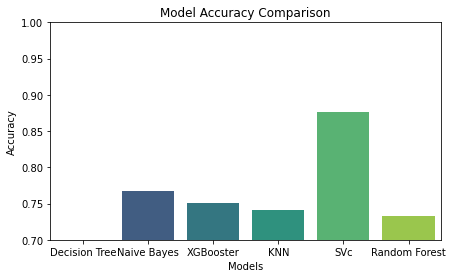

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with your actual accuracy values
models = ['Decision Tree', 'Naive Bayes', 'XGBooster', 'KNN', 'SVc', 'Random Forest']
accuracies = [0.674273, 0.766949, 0.750767, 0.741169, 0.876705 , 0.732919 ]

# Create a bar plot
plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()